# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [5]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [6]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [7]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [8]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [9]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [10]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [11]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [12]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [114]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO') #telepase
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [115]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [116]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [117]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


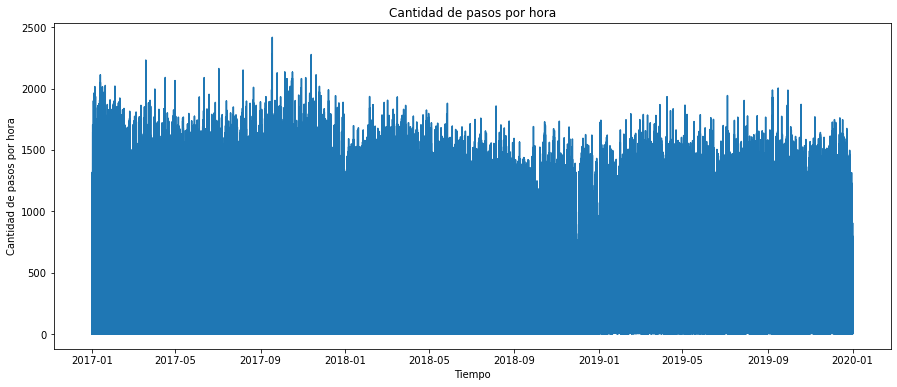

In [120]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos por hora')
plt.title('Cantidad de pasos por hora')
plt.show()

In [119]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


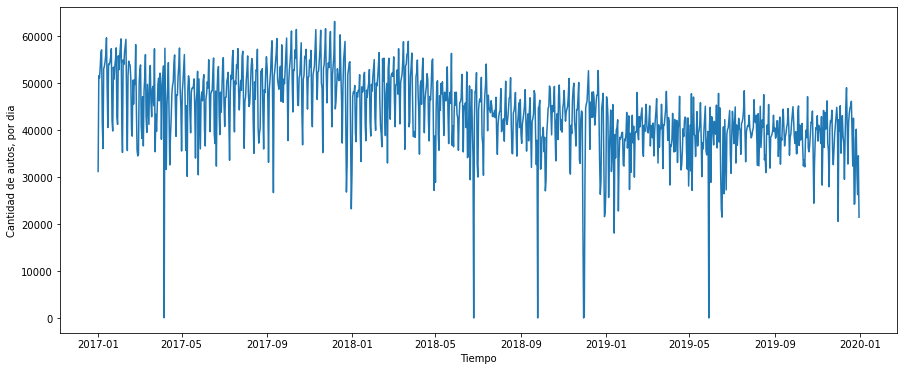

In [19]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

## 1 . Analisis Exploratorio de datos ## 

In [20]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_original = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [21]:
data=diario_original
data.reset_index(inplace=True)

In [22]:
data_original=data.copy() 
data_original.head()

,fecha,cantidad_pasos
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486


## 1.1 Meses de mayor circulacion de vehiculos por dia

Se analizaran los meses de mayor ciruclacion

In [23]:
data_original['year']=data_original.fecha.dt.year 
data_original['month']=data_original.fecha.dt.month 
data_original['day']=data_original.fecha.dt.day

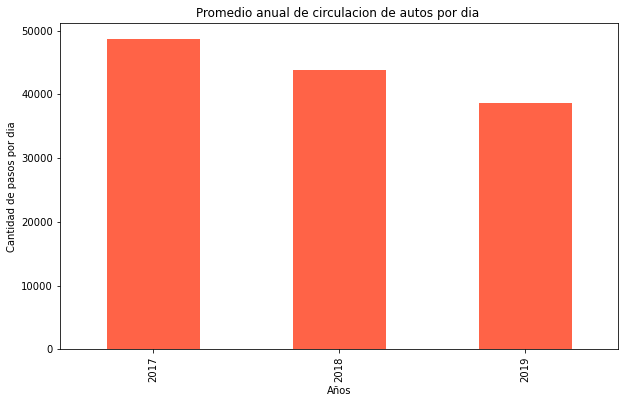

In [94]:
plt.figure(figsize = (10,6))
data_original.groupby('year')['cantidad_pasos'].mean().plot.bar(color='tomato')
plt.title('Promedio anual de circulacion de autos por dia ')
plt.xlabel('Años')
plt.ylabel('Cantidad de pasos por dia')
plt.show()

Se observa que para años posteriores, la cantidad promedio de autos que pasan por la estacion es mas chica. Tener en cuenta que analiza el pago en efectivo y para el 2016 se comenzo a implementar el pago por medio de telepase


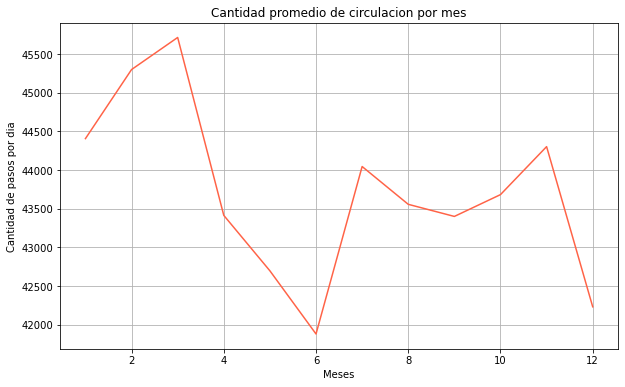

In [96]:
plt.figure(figsize = (10,6))
data_original.groupby('month')['cantidad_pasos'].mean().plot(grid=True, color='tomato')
plt.title('Cantidad promedio de circulacion por mes')
plt.ylabel('Cantidad de pasos por dia')
plt.xlabel('Meses')
plt.show()

Se puede observar que los meses de Junio y Diciembre son los meses de menor circulacion en comparacion de los otros peridos del año

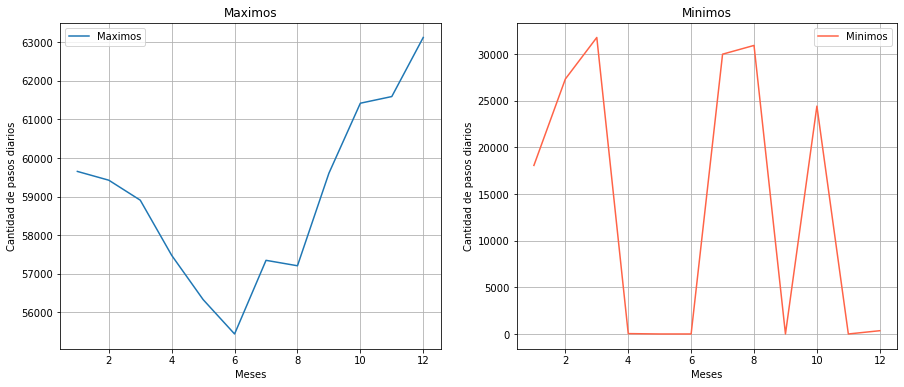

In [102]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title('Maximos')
data_original.groupby('month')['cantidad_pasos'].max().plot(label='Maximos',grid=True)
plt.ylabel('Cantidad de pasos diarios')
plt.xlabel('Meses')
plt.legend()
plt.subplot(1,2,2)
plt.title('Minimos')
data_original.groupby('month')['cantidad_pasos'].min().plot(color='tomato',label='Minimos',grid=True)
plt.ylabel('Cantidad de pasos diarios')
plt.xlabel('Meses')

plt.legend()
plt.show()

Obsevamos que la cantidad maxima de autos por dia esta registrada en el mes de diciembre pero tambien se registra como el mes en que ciruclan la menor cantidad de autos. Lo que implica que el mes de diciembre tiene dias donde recibe una gran catidad de autos y otros dias donde esa cantidad se ve reducida. Esa variabilidad queda registrada calculando la desviacion estandar, donde se observa que el mes de diciembre tiene un mayor desvio. 
A disferencia del mes de junio, donde tiene la menor cantidad de pasos por dia y analizando el los pasos maximos registra los pasos maximos de menor cantidad a diferencia de los demas meses. 


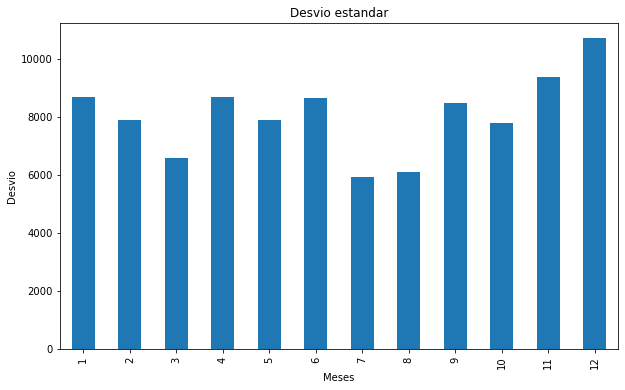

In [103]:
plt.figure(figsize=(10,6))
data_original.groupby('month')['cantidad_pasos'].std().round().plot.bar()
plt.title('Desvio estandar')
plt.xlabel('Meses')
plt.ylabel('Desvio')
plt.show()

Con este analisis se puede concluir que si bien los meses de junio y diciembre son los de menor cantidad de pasos promedio circulan por la estacion illia, el mes de diciembre tiene picos maximos de pasos de autos, pero tambien puntos minimos. Lo que implica que tiene mucha variabilidad. A difencia del mes de junio donde se observa que la circulacion en minima en todos los aspectos (pts. max y minimos). 

### Utilidad de esta informacion 

Puede ayudar a la toma de deciones por ejemplo: 
   
   - Para una persona que desea mudarse de Provincia a Ciudad 
    
   - Si el gobierno tiene que realizar obras en dicha autopista, le serveria saber que el mes de junio tiene menor circulacion y esa cantiad de pasos casi no varia a lo largo de los dias.  

## 1.3  Analizamos los valores nulos ## 

In [28]:
data.isnull().sum()

fecha             0
cantidad_pasos    0
dtype: int64

In [29]:
data=diario.reset_index()

In [30]:
data['date_check'] = data.fecha.diff()
data.date_check.value_counts()

1 days    1094
Name: date_check, dtype: int64

In [31]:
data.head()

,fecha,cantidad_pasos,date_check
0,2017-01-01,31183,NaT
1,2017-01-02,51568,1 days
2,2017-01-03,51093,1 days
3,2017-01-04,53332,1 days
4,2017-01-05,56486,1 days


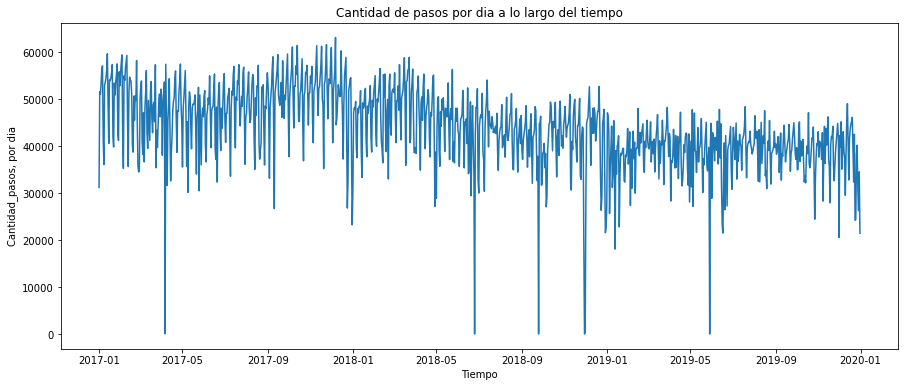

In [121]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title('Cantidad de pasos por dia a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad_pasos, por dia')
plt.show()

## 1.4 Test de Estacionalidad ##

Atravez de esta prueba de hipotesis concluimos que la serie no es estacional

In [123]:
from statsmodels.tsa.stattools import adfuller 
X = diario.cantidad_pasos 
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.185587
p-value: 0.211518
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Hacer: comparar la estacionalidad aplicando.diff

## 1. 5 Analizamos la Media movil ## 

- Comenzamos sacando outliers y rellenando valores faltantes

In [124]:
diario.cantidad_pasos[diario.cantidad_pasos< 10000]=np.nan

In [125]:
print(diario.isna().sum())
diario = diario.interpolate()
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


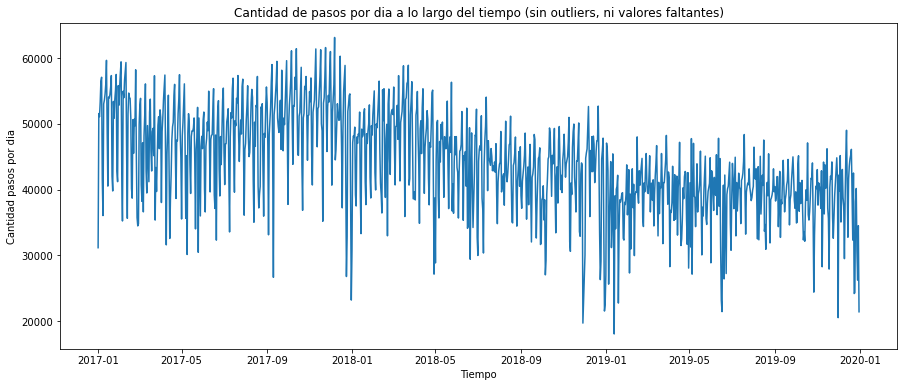

In [126]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title('Cantidad de pasos por dia a lo largo del tiempo (sin outliers, ni valores faltantes)')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad pasos por dia')
plt.show()

In [37]:
# Hay que definir la ventana 
#ventana= int(365/15*365)
promedio_diario=diario.cantidad_pasos.rolling(window=7, center=True).mean()
promedio_diario

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

**Analisis de la tendencia por medio de la media movil** 

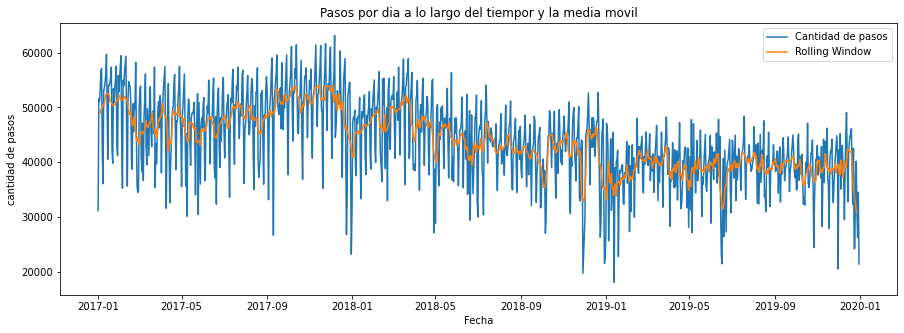

In [107]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(promedio_diario, label = 'Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('cantidad de pasos')
plt.title('Pasos por dia a lo largo del tiempor y la media movil')
plt.legend()
plt.show()

### Tedencia

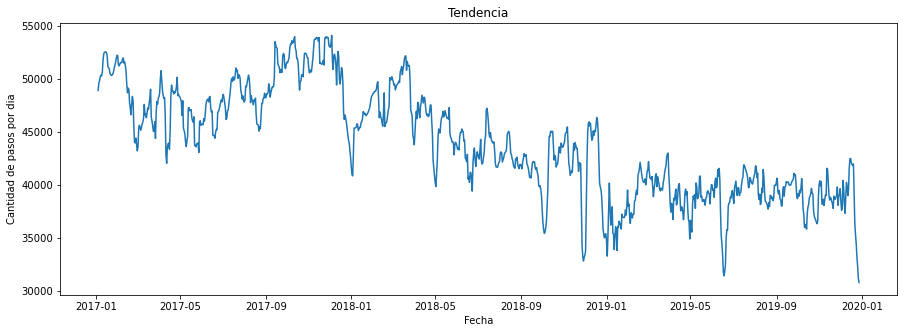

In [109]:
plt.figure(figsize = (15,5))
plt.plot(promedio_diario, label = 'Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos por dia')
plt.title('Tendencia')
plt.show()

## 1.5 Auto-correlacion ##

Muestra que hay una tendencia semanal 

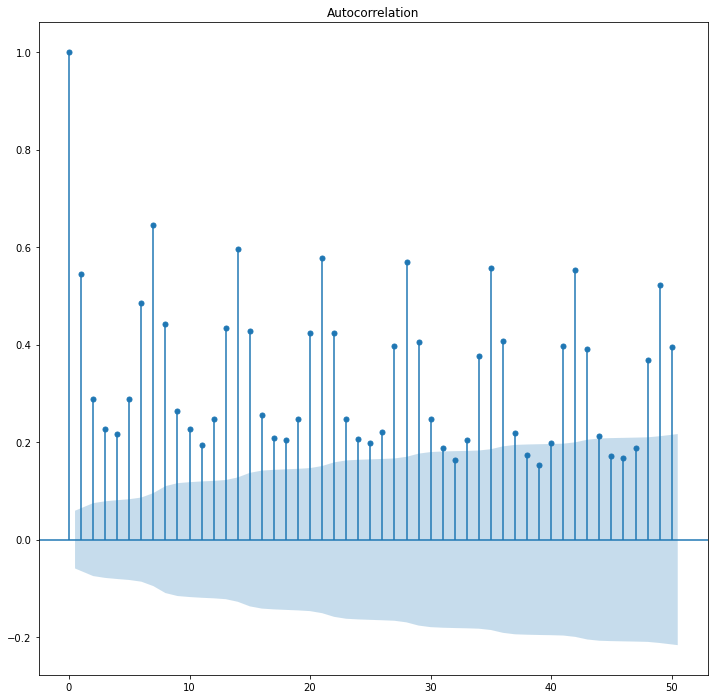

In [111]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags=50)
plt.show()

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose 

result=seasonal_decompose(diario.cantidad_pasos, model='aditive')

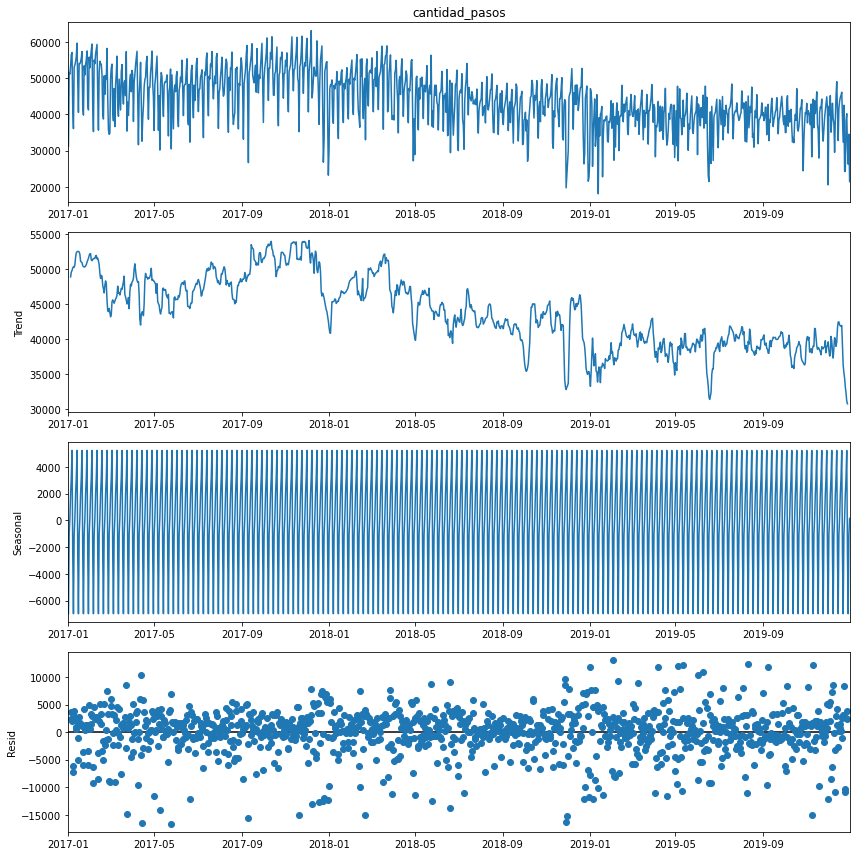

In [42]:
import matplotlib 
matplotlib.rcParams['figure.figsize']=[12,12]
result.plot() 
plt.show()

## 1.6 Analizamos la tendecia para la forma de pago con telepase ## 

In [43]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago TELEPASE
mask_2 = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'TELEPASE') #telepase
dataset = dataset[mask_2]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
20,2019-01-01,1,Martes,Centro,Liviano,59
21,2019-01-01,1,Martes,Centro,Pesado,1
23,2019-01-01,1,Martes,Provincia,Liviano,106
25,2019-01-01,1,Martes,Provincia,Pesado,2
85,2019-01-01,2,Martes,Centro,Liviano,507


In [44]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
20,Martes,Centro,Liviano,59,2019-01-01 01:00:00
21,Martes,Centro,Pesado,1,2019-01-01 01:00:00
23,Martes,Provincia,Liviano,106,2019-01-01 01:00:00
25,Martes,Provincia,Pesado,2,2019-01-01 01:00:00
85,Martes,Centro,Liviano,507,2019-01-01 02:00:00


In [45]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
20,Martes,Centro,Liviano,59,2019-01-01 01:00:00
21,Martes,Centro,Pesado,1,2019-01-01 01:00:00
23,Martes,Provincia,Liviano,106,2019-01-01 01:00:00
25,Martes,Provincia,Pesado,2,2019-01-01 01:00:00
85,Martes,Centro,Liviano,507,2019-01-01 02:00:00


In [46]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Pesado,9,2017-01-01 00:00:00
1,Domingo,Provincia,Pesado,3,2017-01-01 00:00:00
2,Domingo,Provincia,Pesado,7,2017-01-01 00:00:00
3,Domingo,Provincia,Liviano,275,2017-01-01 00:00:00
4,Domingo,Centro,Liviano,459,2017-01-01 00:00:00
...,...,...,...,...,...
204607,Martes,Provincia,Liviano,600,2019-12-31 22:00:00
204608,Martes,Centro,Liviano,630,2019-12-31 22:00:00
204609,Martes,Provincia,Liviano,110,2019-12-31 23:00:00
204610,Martes,Centro,Liviano,122,2019-12-31 23:00:00


In [47]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_2 = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario_2.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,12326
2017-01-02,35621
2017-01-03,39390
2017-01-04,40294
2017-01-05,41373


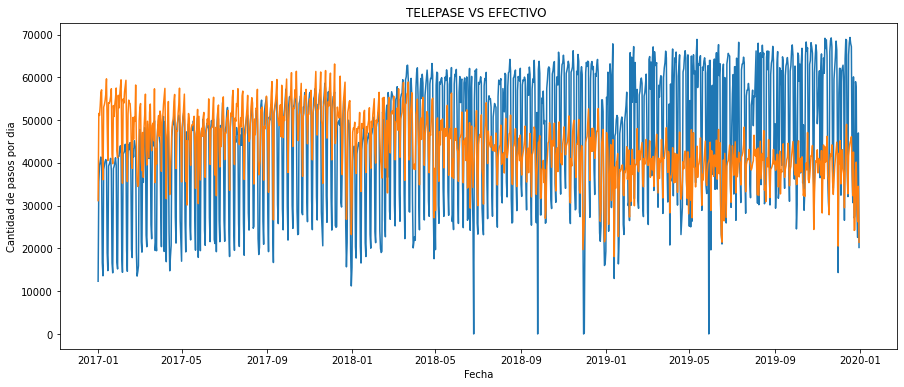

In [112]:
plt.figure(figsize = (15,6))
plt.plot(diario_2.index, diario_2.cantidad_pasos)
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos por dia')
plt.title('TELEPASE VS EFECTIVO ')

plt.show()

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose 

result_2=seasonal_decompose(diario_2.cantidad_pasos, model='aditive')

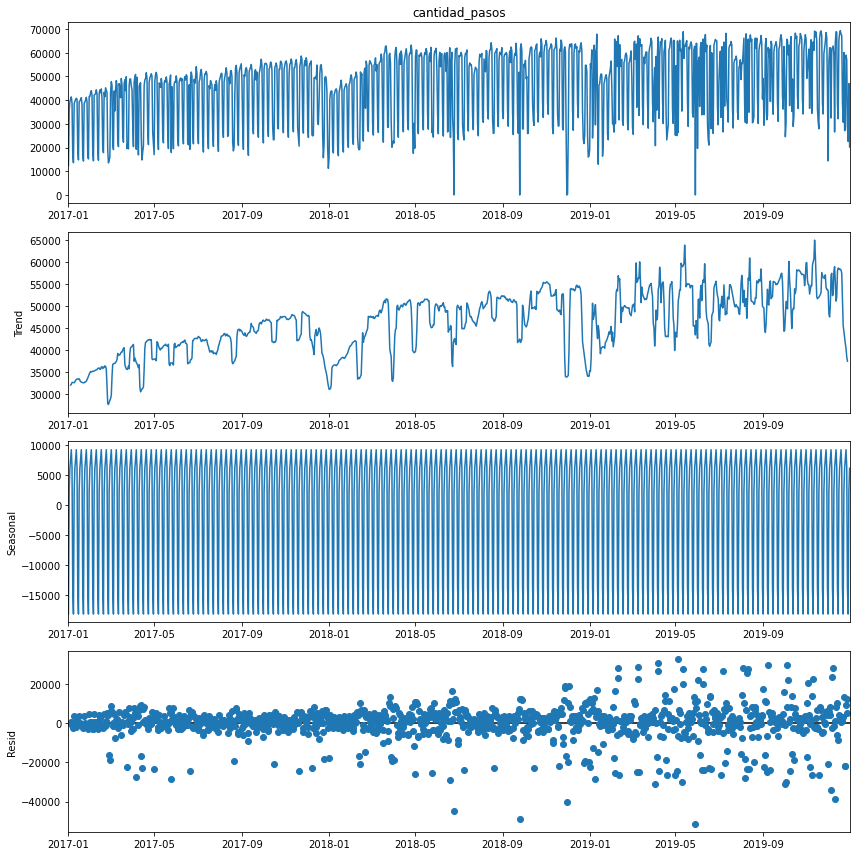

In [50]:
import matplotlib 
matplotlib.rcParams['figure.figsize']=[12,12]
result_2.plot() 
plt.show()

## 1.6.1 Comparacion de las tendecias para metodo de pago por Telepase y Efectivo ##  

Analizasamos la tendencia de cada una, donde se puede apreciar mejor la tendecia positiva para la forma de pago por telepase y la negativa de pago en efectivo

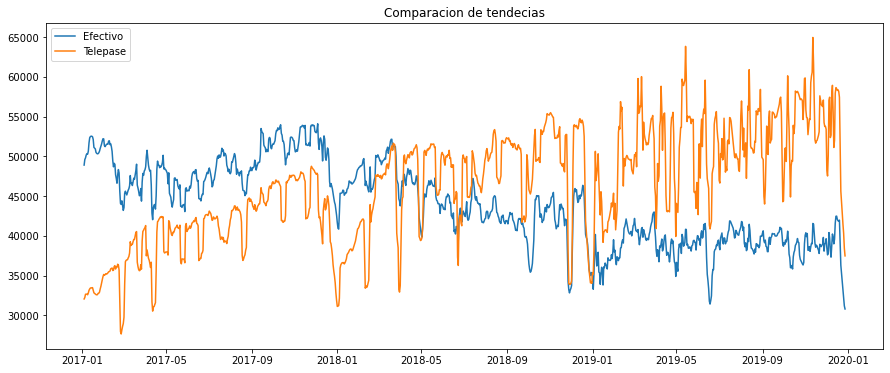

In [51]:
plt.figure(figsize=(15,6))
plt.plot(result.trend,label='Efectivo')
plt.plot(result_2.trend, label='Telepase') 
plt.title('Comparacion de tendecias')
plt.legend() 
plt.show()

El telepase se comenzo a implementar en el año 2016, por lo que desde el año 2017 se puede observar la tendencia positiva para la forma de pago de telepase y desde el año 2018 la tendencia negativa para la forma de pago en efectivo

In [52]:
np.corrcoef(diario.cantidad_pasos, diario_2.cantidad_pasos)

array([[1.        , 0.42221972],
       [0.42221972, 1.        ]])

## 2.1  One-Step Prediction ##  

In [53]:
diario_osp=diario.cantidad_pasos
diario_osp.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [54]:
look_back=90*1 #uso 90 dias para predecir el valor siguiente

In [55]:
N=diario_2.shape[0]
X=np.zeros((N- look_back - 1, look_back))
y=np.zeros(N- look_back-1)
print(X.shape, y.shape)

(1004, 90) (1004,)


In [56]:
# LLenamos las funcion x e y

for i in range (X.shape[0]): 
    X[i,:]= diario_osp.iloc[i:i+look_back]
    y[i]=diario_osp.iloc[i+look_back]

In [57]:
print(X)

[[31183. 51568. 51093. ... 51074. 46235. 52127.]
 [51568. 51093. 53332. ... 46235. 52127. 50995.]
 [51093. 53332. 56486. ... 52127. 50995. 38045.]
 ...
 [38348. 37170. 39669. ... 24349. 38168. 40182.]
 [37170. 39669. 34943. ... 38168. 40182. 30681.]
 [39669. 34943. 35054. ... 40182. 30681. 26259.]]


In [58]:
print(y)

[50995. 38045. 48833. ... 30681. 26259. 34523.]


In [59]:
N_train= 365*2- look_back
N_test=365 

length_total= N_train + N_test + look_back 

X_train = X[:N_train,:]
y_train= y[:N_train]
print(X_train.shape, y_train.shape)

X_test= X[N_train:N_train+N_test,:]
y_test= y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)


(640, 90) (640,)
(364, 90) (364,)


**Modelo de Benchmark**

In [60]:
y_test_pred_benchmark=y[-1+N_train:N_train+N_test-1]

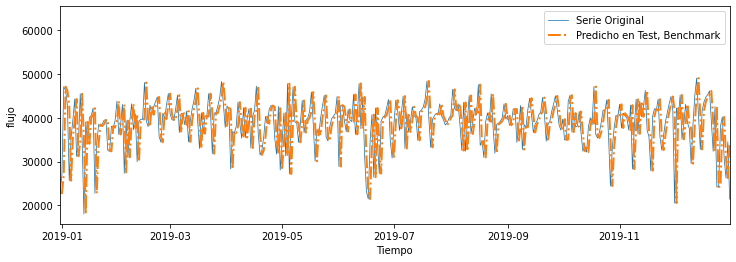

In [61]:
plt.figure(figsize=(12,4)) 
plt.plot(diario_osp.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original') 
plt.plot(diario_osp.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark') 
plt.xlim(diario_osp.index[N_train+look_back-1], diario_osp.index[length_total-1]) 
plt.xlabel('Tiempo') 
plt.ylabel('flujo')
plt.legend() 
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error 

**Eleccion de la medida de error RMSE** 

Se selecciono para evaluar los modelos con **RMSE** ya que se considero que es la metrica que mas se ajusta al tipo de problema a evaluar, ya que se utiliza con frecuencia en problemas de pronosticos de demanda y pronosticos de precios, haciendo que la diferencias de la  falla del modelo no sea tan castigado, no obstatante siempre termina **no** siendo perfecto el análisis.  
Con respecto el RMSE que es la raiz del modelo MSE ( que lo logro con el parametro 'Squared'done se cola 'False' para que arroje el valor de RMSE), al ser la raiz dara un valor mas chico que el modelo MSE, por lo que nosotros buscamos que el valor del RMSE sea el mas chico posible, ya que indicaria menor error.


In [63]:
MSE=mean_squared_error(y_test, y_test_pred_benchmark[:-1], squared=False)
print('Error en test:',MSE.round())

Error en test: 6634.0


## 2.1 Random Forest ## 

In [64]:
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor 

rf= RandomForestRegressor (n_estimators=40, random_state=42, n_jobs=4).fit(X_train,y_train)

In [65]:
y_pred=rf.predict(X)
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

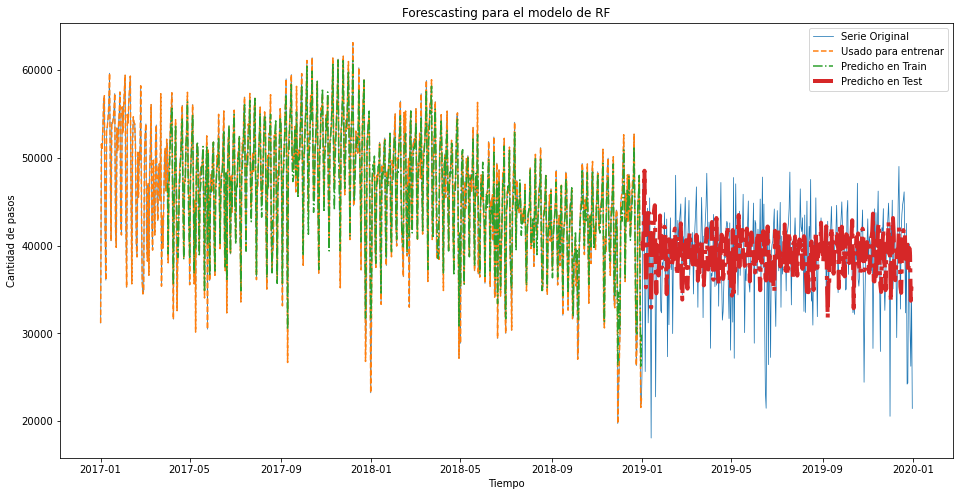

In [127]:
plt.figure(figsize=(16,8))
plt.plot(diario_osp.index[:length_total], diario_osp[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario_osp.index[:N_train + look_back], diario_osp[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario_osp.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario_osp.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.title('Forescasting para el modelo de RF')
plt.show()

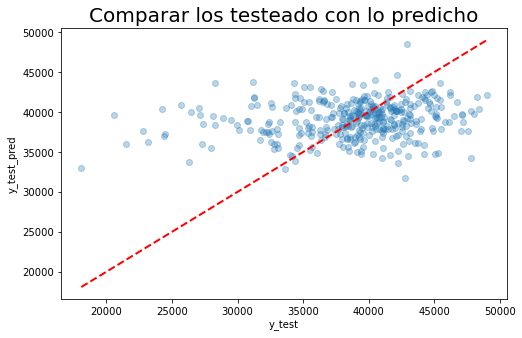

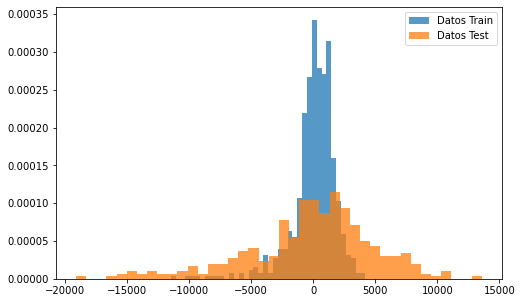

In [67]:
plt.figure(figsize=(8,5))

plt.scatter(y_test,y_test_pred,alpha=0.3)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho',fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 


plt.figure(figsize=(8,5))
plt.hist(y_train-y_train_pred,density=1,alpha=0.75,bins=40,histtype='bar',label='Datos Train')
plt.hist(y_test-y_test_pred, density=1, alpha=0.75,bins=40,histtype='bar', label='Datos Test') 
plt.legend()


plt.show()

In [68]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_train,y_train_pred,squared=False)
MSE_test=mean_squared_error(y_test, y_test_pred, squared=False)
print('Error del train:',MSE.round())
print('Error del test:',MSE_test.round())

Error del train: 1852.0
Error del test: 5181.0


## Curva de validacion 

In [70]:
scores_train = []
scores_test = []
N_estimadores = np.arange(1,50)
for n_estimadores in N_estimadores:
    regr=RandomForestRegressor(n_estimators=n_estimadores)
    regr.fit(X_train, y_train)
    
    y_train_pred_2= regr.predict(X_train)
    y_test_pred_2 = regr.predict(X_test)
    
    scores_train.append(mean_squared_error(y_train, y_train_pred_2, squared= False))
    scores_test.append(mean_squared_error(y_test, y_test_pred_2, squared= False))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

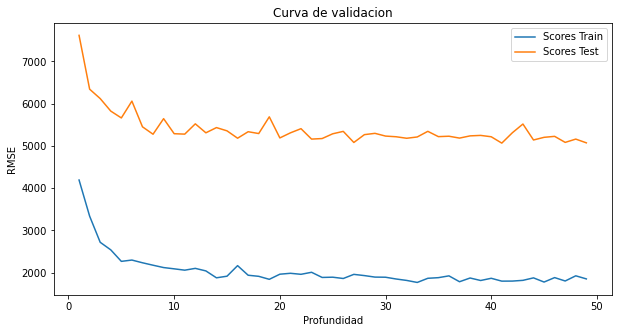

In [71]:
plt.figure(figsize=(10,5))
plt.plot(N_estimadores,scores_train, label = 'Scores Train')
plt.plot(N_estimadores,scores_test, label = 'Scores Test')
plt.title('Curva de validacion')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Profundidad')
plt.show()

## 2.2 Optimizacion de hiperparametros para el Random Forest ##

In [72]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np 

rf_2= RandomForestRegressor ()

In [73]:
param_grid={'n_estimators':[10,20,30,40,50]}

tscv=TimeSeriesSplit(n_splits=3)
g_search= GridSearchCV(estimator=rf_2, cv=tscv, scoring= 'neg_mean_squared_error', param_grid= param_grid) 

g_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [74]:
y_train_pred_2=g_search.predict(X_train)
y_test_pred_2=g_search.predict(X_test)

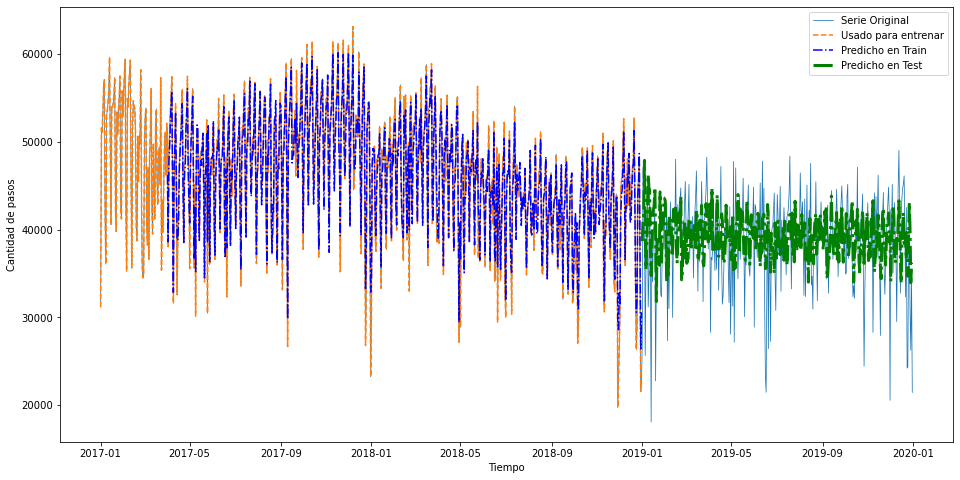

In [75]:
plt.figure(figsize=(16,8))
plt.plot(diario_osp.index[:length_total], diario_osp[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario_osp.index[:N_train + look_back], diario_osp[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario_osp.index[look_back: look_back + N_train], y_train_pred_2,'-.',label = 'Predicho en Train',color='b')
plt.plot(diario_osp.index[N_train+look_back: length_total-1], y_test_pred_2,'-.', lw = 3, label = 'Predicho en Test', color='g')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

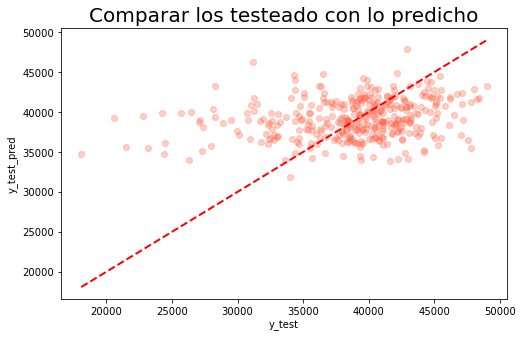

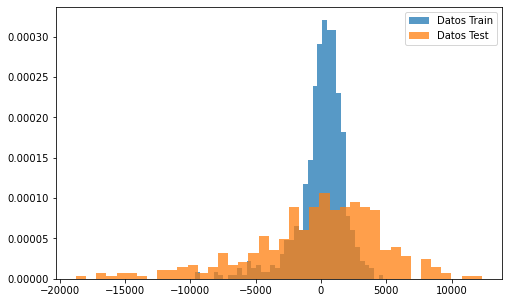

In [76]:
plt.figure(figsize=(8,5))

plt.scatter(y_test,y_test_pred_2,alpha=0.3,color='tomato')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho',fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 


plt.figure(figsize=(8,5))
plt.hist(y_train-y_train_pred_2,density=1,alpha=0.75,bins=40,histtype='bar',label='Datos Train')
plt.hist(y_test-y_test_pred_2, density=1, alpha=0.75,bins=40,histtype='bar', label='Datos Test') 
plt.legend()


plt.show()

In [77]:
MSE=mean_squared_error(y_train,y_train_pred,squared=False)
MSE_test=mean_squared_error(y_test, y_test_pred_2, squared=False)
print('Error del train:',MSE.round())
print('Error del test:',MSE_test.round())

Error del train: 1852.0
Error del test: 5093.0


## 2.3 XGBoost 

In [78]:
import xgboost as xgb 

In [79]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np 

In [80]:
xgb_regre=xgb.XGBRegressor() 

param_search={'max_depths':[10,20,30,40,50,60],
             'n_estimators':[10,20,30,40,50,60]}

tscv_2=TimeSeriesSplit(n_splits=25)
gsearch= GridSearchCV(estimator=xgb_regre, cv=tscv, scoring='neg_mean_squared_error', 
                     param_grid=param_search)

gsearch.fit(X_train,y_train)

[10:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             estimator=XGBRegressor(),
             param_grid={'max_depths': [10, 20, 30, 40, 50, 60],
                         'n_estimators': [10, 20, 30, 40, 50, 60]},
             scoring='neg_mean_squared_error')

In [81]:
y_train_pred_xgb = gsearch.predict(X_train) 
y_test_pred_xgb = gsearch.predict(X_test)
y_train_pred.shape

(640,)

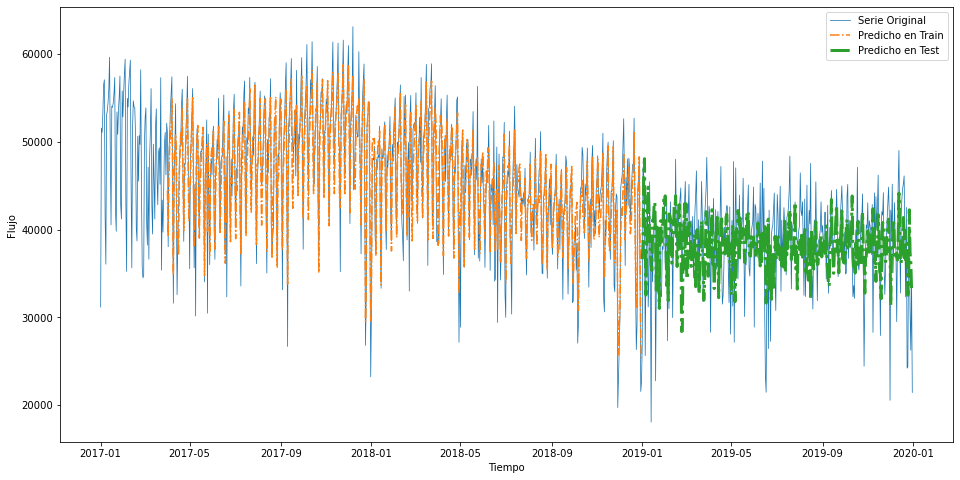

In [82]:
plt.figure(figsize=(16,8)) 
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original') 
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred_xgb,'-.',label = 'Predicho en Train') 
plt.plot(diario.index[N_train+look_back: length_total-1], y_test_pred_xgb,'-.', lw = 3, label = 'Predicho en Test') 
plt.legend() 
plt.xlabel('Tiempo') 
plt.ylabel('Flujo') 
plt.show()

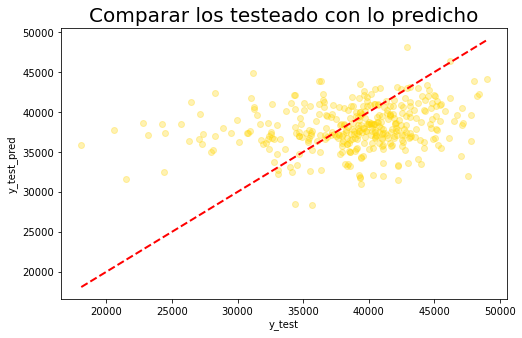

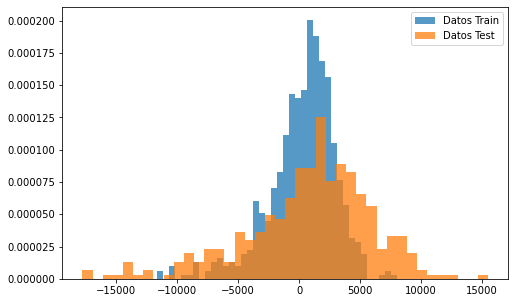

In [83]:
plt.figure(figsize=(8,5))

plt.scatter(y_test,y_test_pred_xgb,alpha=0.3,color='gold')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho',fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 


plt.figure(figsize=(8,5))
plt.hist(y_train-y_train_pred_xgb,density=1,alpha=0.75,bins=40,histtype='bar',label='Datos Train')
plt.hist(y_test-y_test_pred_xgb, density=1, alpha=0.75,bins=40,histtype='bar', label='Datos Test') 
plt.legend()


plt.show()

In [128]:
MSE = mean_squared_error(y_train, y_train_pred_xgb) 
print('Error en Train:',np.sqrt(MSE).round())
MSE = mean_squared_error(y_test, y_test_pred_xgb) 
print('Error en Test:',np.sqrt(MSE).round())

Error en Train: 2784.0
Error en Test: 5300.0


In [132]:
scores_train = []
scores_test = []
N_estimadores = np.arange(1,50)
for n_estimadores in N_estimadores:
    regr=RandomForestRegressor(n_estimators=n_estimadores)
    regr.fit(X_train, y_train)
    
    y_train_pred_xgb= regr.predict(X_train)
    y_test_pred_xgb = regr.predict(X_test)
    
    scores_train.append(mean_squared_error(y_train, y_train_pred_xgb, squared= False))
    scores_test.append(mean_squared_error(y_test, y_test_pred_xgb, squared= False))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

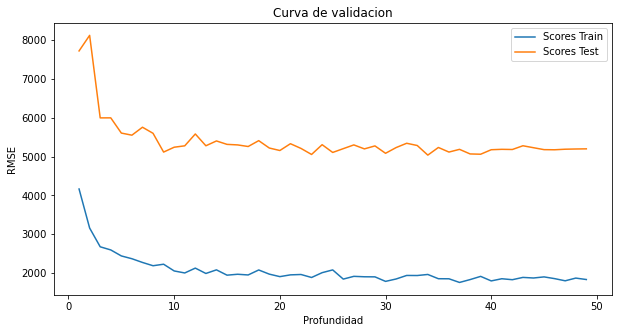

In [133]:
plt.figure(figsize=(10,5))
plt.plot(N_estimadores,scores_train, label = 'Scores Train')
plt.plot(N_estimadores,scores_test, label = 'Scores Test')
plt.title('Curva de validacion')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Profundidad')
plt.show()

## 2.4 Multi-Step 

In [85]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

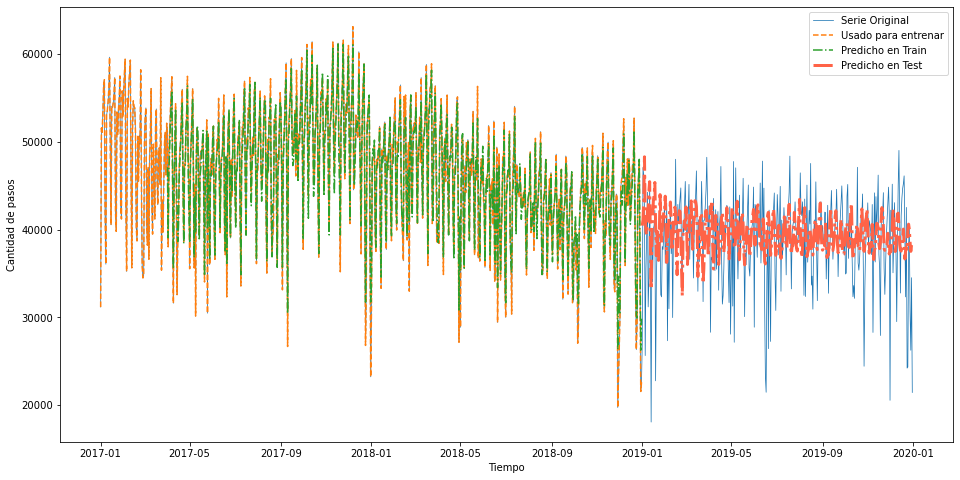

In [86]:
plt.figure(figsize=(16,8))
plt.plot(diario_osp.index[:length_total], diario_osp[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario_osp.index[:N_train + look_back], diario_osp[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario_osp.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario_osp.index[N_train+look_back: length_total-1], y_ms_test_pred,'-.', lw = 3, label = 'Predicho en Test', color='tomato')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [129]:
MSE = mean_squared_error(y_test, y_ms_test_pred, squared= False)
print('Error en test:',MSE.round())

Error en test: 4950.0


In [88]:
!pip install shap

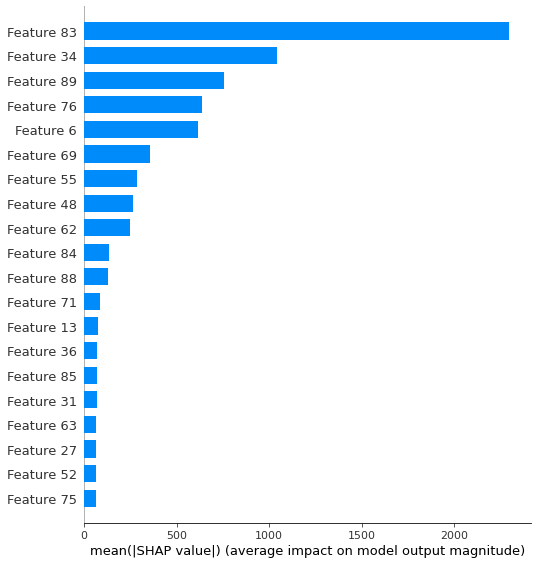

In [89]:
import shap 
model=g_search.best_estimator_ 
shap_values=shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train,plot_type='bar')

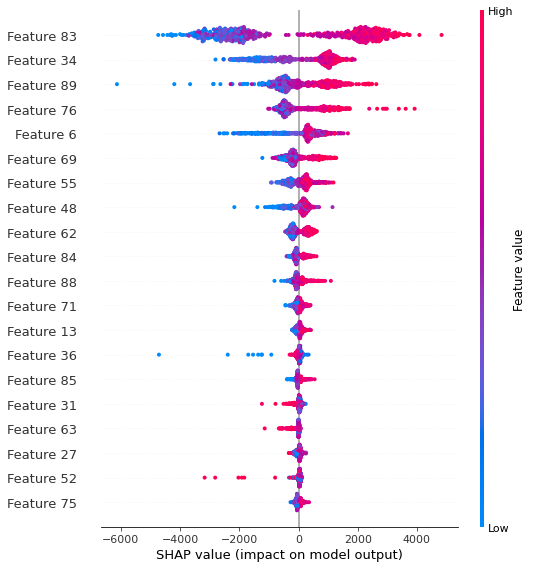

TypeError: savefig() missing 1 required positional argument: 'fname'

In [90]:
f= plt.figure() 
shap.summary_plot(shap_values, X_train)
f.savefig(bbox_inches='tight', dpi=600)